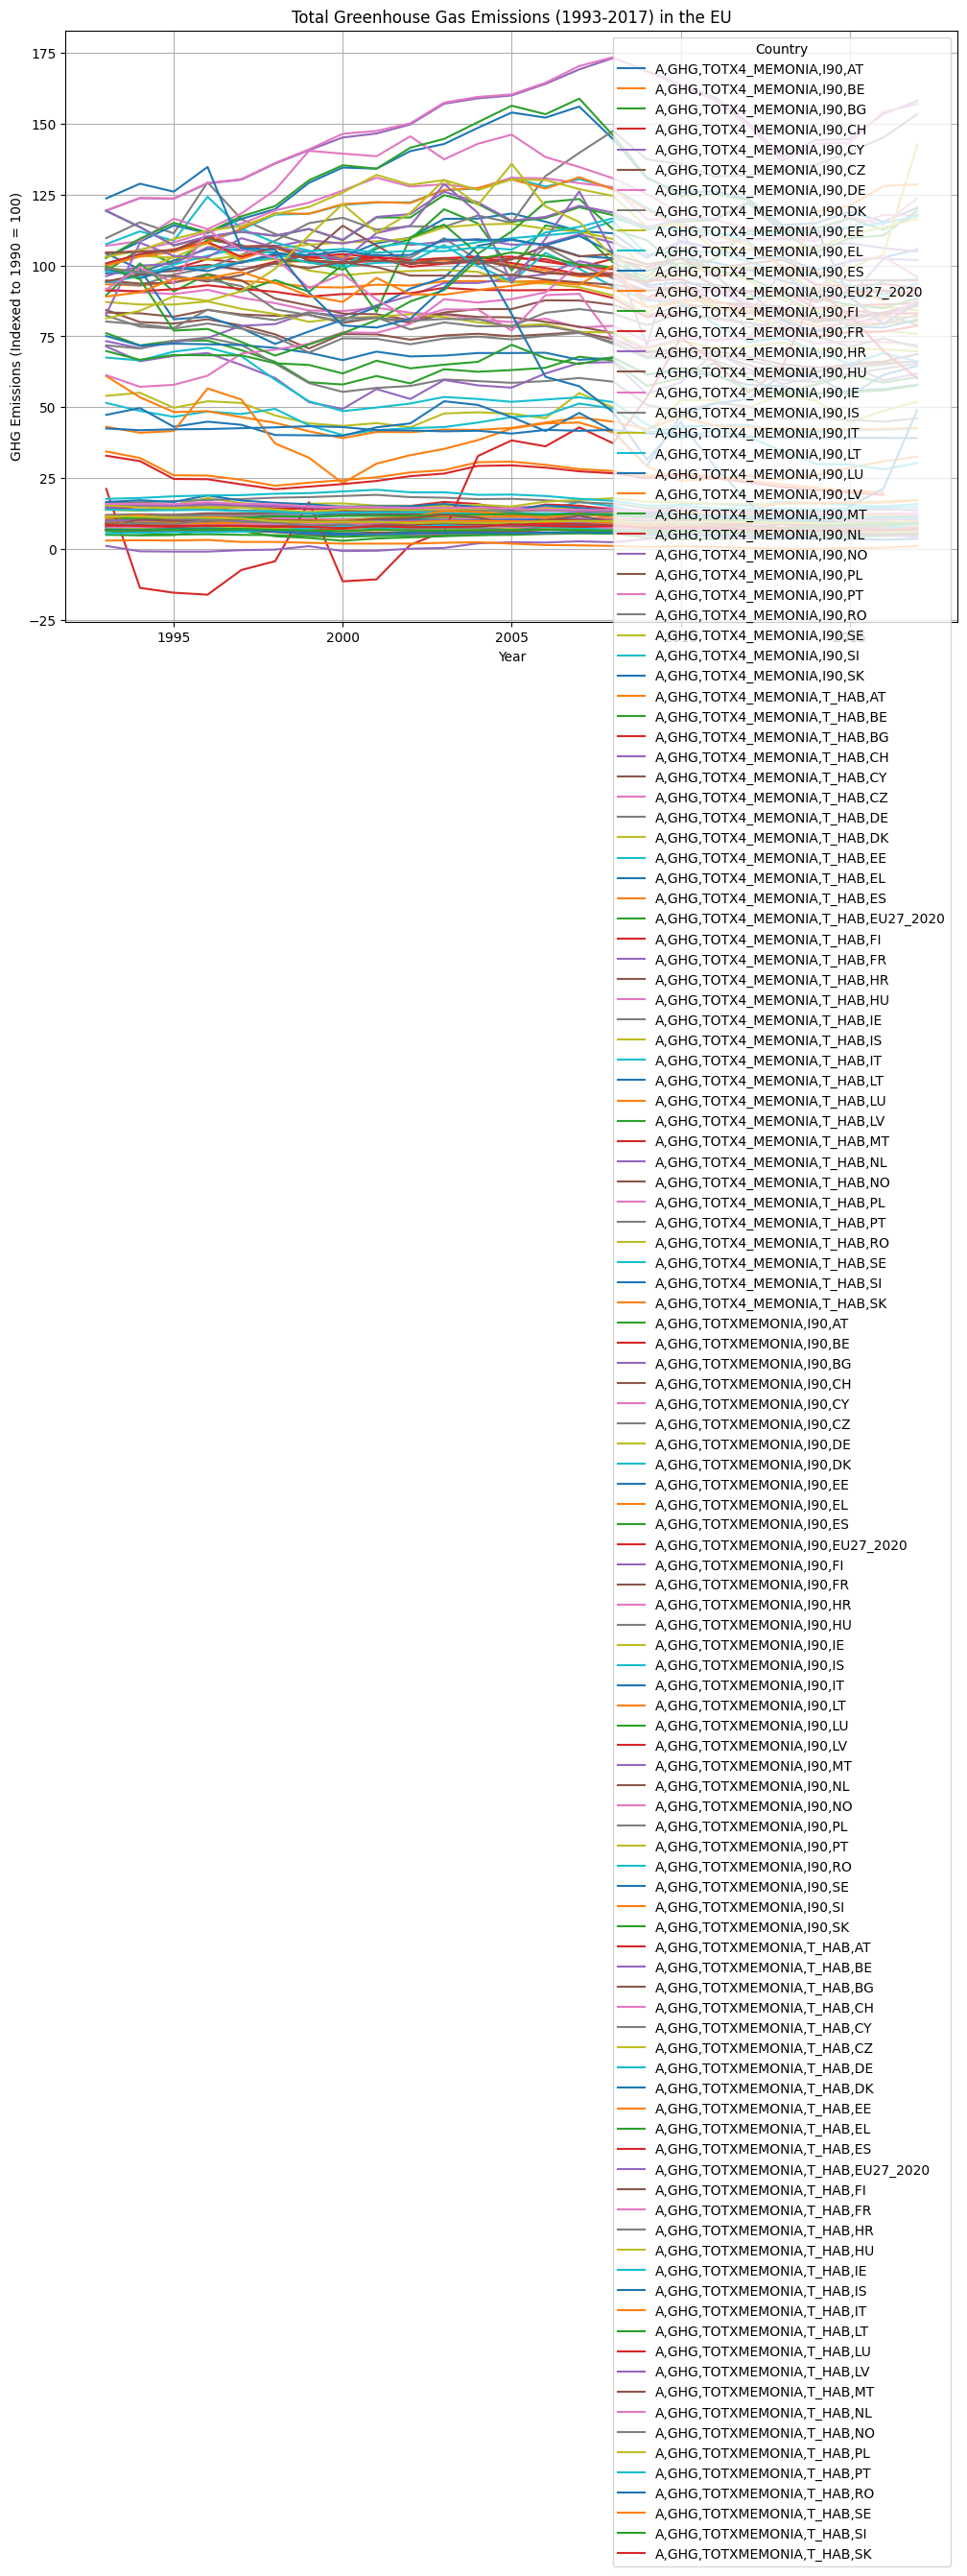

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the TSV file
url = '/content/estat_sdg_13_10.tsv'
df = pd.read_csv(url, sep="\t")  # Adjust the separator if needed

# Rename the first column to "geo" to match the id_vars in melt
df.columns = ['geo'] + df.columns.tolist()[1:]

# Convert the data from wide format to long format for plotting
df_long = pd.melt(df, id_vars="geo", var_name="Year", value_name="GHG Emissions")
df_long["Year"] = df_long["Year"].astype(int)

# Convert the 'GHG Emissions' column to numeric, forcing errors to NaN (if any)
df_long["GHG Emissions"] = pd.to_numeric(df_long["GHG Emissions"], errors='coerce')

# Filter data for the years 1993 to 2017
df_filtered = df_long[(df_long["Year"] >= 1993) & (df_long["Year"] <= 2017)]

# Plotting
plt.figure(figsize=(12, 8))
for country in df_filtered["geo"].unique():
    country_data = df_filtered[df_filtered["geo"] == country]
    # Drop any rows with NaN GHG Emissions values to avoid plotting issues
    country_data = country_data.dropna(subset=["GHG Emissions"])
    plt.plot(country_data["Year"], country_data["GHG Emissions"], label=country)

# Add plot details
plt.title("Total Greenhouse Gas Emissions (1993-2017) in the EU")
plt.xlabel("Year")
plt.ylabel("GHG Emissions (Indexed to 1990 = 100)")
plt.legend(title="Country")
plt.grid(True)
plt.show()


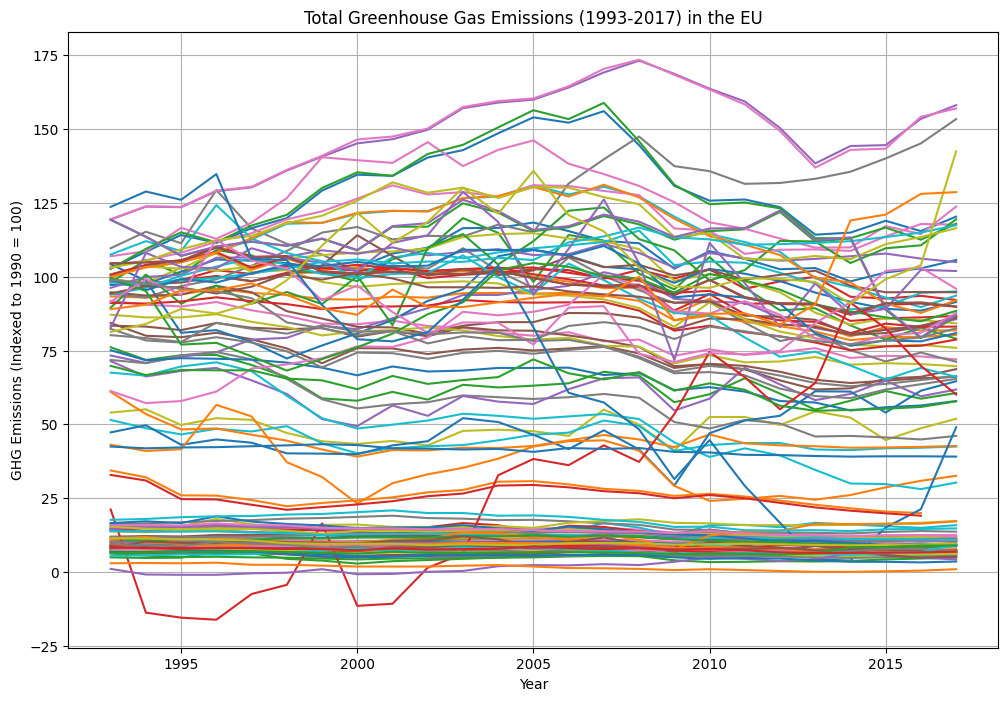

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the TSV file
url = '/content/estat_sdg_13_10.tsv'
df = pd.read_csv(url, sep="\t")  # Adjust the separator if needed

# Rename the first column to "geo" to match the id_vars in melt
df.columns = ['geo'] + df.columns.tolist()[1:]

# Convert the data from wide format to long format for plotting
df_long = pd.melt(df, id_vars="geo", var_name="Year", value_name="GHG Emissions")
df_long["Year"] = df_long["Year"].astype(int)

# Convert the 'GHG Emissions' column to numeric, forcing errors to NaN (if any)
df_long["GHG Emissions"] = pd.to_numeric(df_long["GHG Emissions"], errors='coerce')

# Filter data for the years 1993 to 2017
df_filtered = df_long[(df_long["Year"] >= 1993) & (df_long["Year"] <= 2017)]

# Plotting
plt.figure(figsize=(12, 8))
for country in df_filtered["geo"].unique():
    country_data = df_filtered[df_filtered["geo"] == country]
    # Drop any rows with NaN GHG Emissions values to avoid plotting issues
    country_data = country_data.dropna(subset=["GHG Emissions"])
    plt.plot(country_data["Year"], country_data["GHG Emissions"], label=country)

# Add plot details
plt.title("Total Greenhouse Gas Emissions (1993-2017) in the EU")
plt.xlabel("Year")
plt.ylabel("GHG Emissions (Indexed to 1990 = 100)")

plt.grid(True)
plt.show()


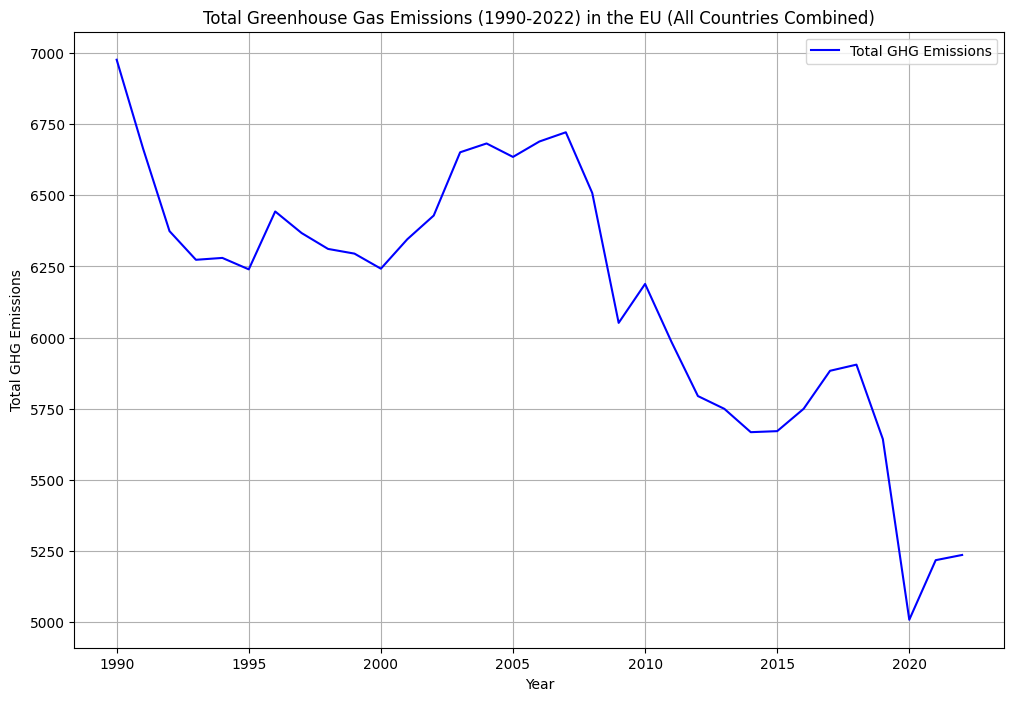

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the TSV file
url = '/content/estat_sdg_13_10.tsv'
df = pd.read_csv(url, sep="\t")  # Adjust the separator if needed

# Rename the first column to "geo" to match the id_vars in melt
df.columns = ['geo'] + df.columns.tolist()[1:]

# Convert the data from wide format to long format for plotting
df_long = pd.melt(df, id_vars="geo", var_name="Year", value_name="GHG Emissions")
df_long["Year"] = df_long["Year"].astype(int)

# Convert the 'GHG Emissions' column to numeric, forcing errors to NaN (if any)
df_long["GHG Emissions"] = pd.to_numeric(df_long["GHG Emissions"], errors='coerce')

# Filter data for the years 1990 to 2022
df_filtered = df_long[(df_long["Year"] >= 1990) & (df_long["Year"] <= 2022)]

# Aggregate the emissions by year (sum over all countries)
df_total = df_filtered.groupby("Year")["GHG Emissions"].sum()

# Plotting the total emissions across all countries
plt.figure(figsize=(12, 8))
plt.plot(df_total.index, df_total.values, label="Total GHG Emissions", color='blue')

# Add plot details
plt.title("Total Greenhouse Gas Emissions (1990-2022) in the EU (All Countries Combined)")
plt.xlabel("Year")
plt.ylabel("Total GHG Emissions")
plt.grid(True)
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

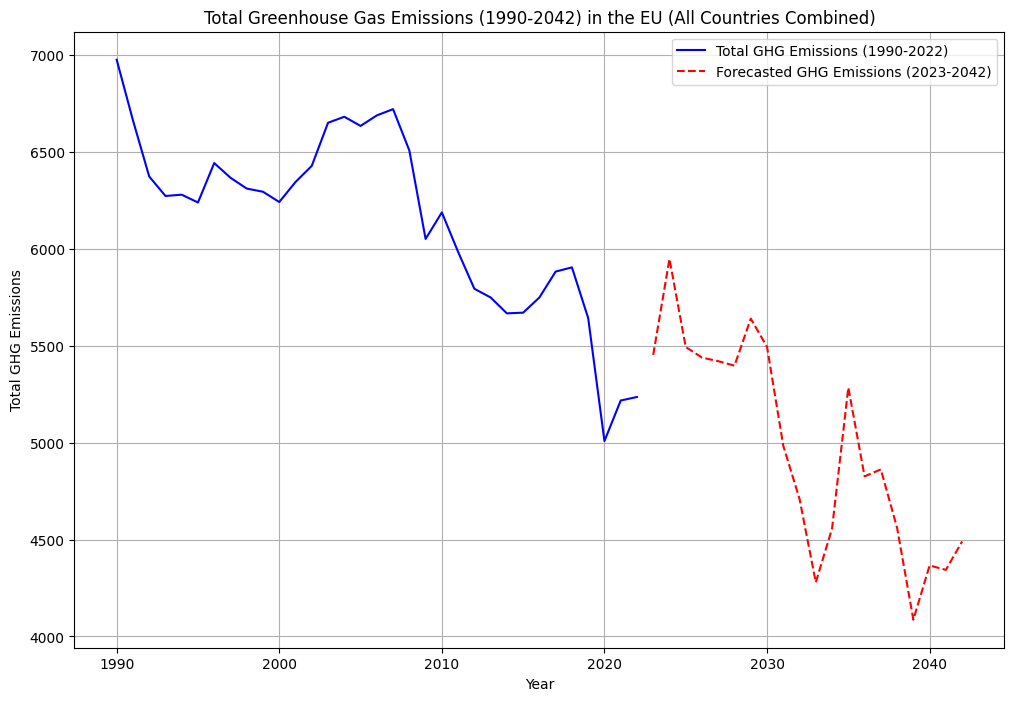

Forecasted GHG Emissions for 2023-2027:
Year 2023: 5453.11
Year 2024: 5948.41
Year 2025: 5493.82
Year 2026: 5439.19
Year 2027: 5420.64
Year 2028: 5397.54
Year 2029: 5640.18
Year 2030: 5494.39
Year 2031: 4984.15
Year 2032: 4709.63
Year 2033: 4279.33
Year 2034: 4557.38
Year 2035: 5284.65
Year 2036: 4826.47
Year 2037: 4862.26
Year 2038: 4560.48
Year 2039: 4086.49
Year 2040: 4366.63
Year 2041: 4343.66
Year 2042: 4490.32


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Load data from the TSV file
url = '/content/estat_sdg_13_10.tsv'
df = pd.read_csv(url, sep="\t")  # Adjust the separator if needed

# Rename the first column to "geo" to match the id_vars in melt
df.columns = ['geo'] + df.columns.tolist()[1:]

# Convert the data from wide format to long format for plotting
df_long = pd.melt(df, id_vars="geo", var_name="Year", value_name="GHG Emissions")
df_long["Year"] = df_long["Year"].astype(int)

# Convert the 'GHG Emissions' column to numeric, forcing errors to NaN (if any)
df_long["GHG Emissions"] = pd.to_numeric(df_long["GHG Emissions"], errors='coerce')

# Filter data for the years 1990 to 2022
df_filtered = df_long[(df_long["Year"] >= 1990) & (df_long["Year"] <= 2022)]

# Aggregate the emissions by year (sum over all countries)
df_total = df_filtered.groupby("Year")["GHG Emissions"].sum()

# Fit ARIMA model
model = ARIMA(df_total, order=(20, 1, 0))  # Example ARIMA(5, 1, 0) model
model_fit = model.fit()

# Forecast future emissions (e.g., for the next 5 years)
forecast_steps = 20
forecast = model_fit.forecast(steps=forecast_steps)

# Create a new index for future years
forecast_years = np.arange(df_total.index[-1] + 1, df_total.index[-1] + forecast_steps + 1)

# Plot original data and forecasted values
plt.figure(figsize=(12, 8))
plt.plot(df_total.index, df_total.values, label="Total GHG Emissions (1990-2022)", color='blue')
plt.plot(forecast_years, forecast, label="Forecasted GHG Emissions (2023-2042)", color='red', linestyle='--')

# Add plot details
plt.title("Total Greenhouse Gas Emissions (1990-2042) in the EU (All Countries Combined)")
plt.xlabel("Year")
plt.ylabel("Total GHG Emissions")
plt.grid(True)
plt.legend()
plt.show()

# Print the forecasted emissions
print("Forecasted GHG Emissions for 2023-2027:")
for year, emission in zip(forecast_years, forecast):
    print(f"Year {year}: {emission:.2f}")


In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=71a740ca22e9f9e00e60fad63f651b8a872c88111a4c285a6eb157d9f6025af7
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
df = pd.read_csv(url, sep="\t", nrows=5)
print(df.head())


  freq,unit,airpol,src_crf,geo\TIME_PERIOD 1985  1986  1987      1988   \
0                      A,MIO_T,CH4,CRF1,AT    :     :     :         :    
1                      A,MIO_T,CH4,CRF1,BE    :     :     :         :    
2                      A,MIO_T,CH4,CRF1,BG    :     :     :   0.10749    
3                      A,MIO_T,CH4,CRF1,CH    :     :     :         :    
4                      A,MIO_T,CH4,CRF1,CY    :     :     :         :    

      1989     1990     1991     1992     1993   ...    2013     2014   \
0        :   0.04832  0.04364  0.04276  0.04038  ...  0.02632  0.02421   
1        :   0.06407  0.05935  0.05341  0.05451  ...  0.04401  0.04001   
2  0.10792   0.09973  0.08446  0.09381  0.09467  ...  0.05964  0.05941   
3        :   0.01526  0.01561  0.01496  0.01415  ...  0.00711  0.00608   
4        :   0.00051  0.00052  0.00052  0.00052  ...  0.00053  0.00051   

     2015     2016     2017     2018     2019     2020     2021     2022   
0  0.02431  0.02447  0.02583  0.02

In [ ]:
# Check unique values in 'airpol' to confirm available pollutants
print("Unique pollutants in the data:", df_melted['airpol'].unique())

# Filter the data for the pollutants that are available
available_pollutants = df_melted['airpol'].unique()  # Get actual pollutants in data
pollutants = [p for p in ['NH3', 'NMVOC', 'SOx', 'NOx', 'PM10', 'PM2.5'] if p in available_pollutants]
print("Filtered pollutants for clustering:", pollutants)

# Filter and pivot the table based on available pollutants
df_filtered = df_melted[df_melted['airpol'].isin(pollutants)]
df_pivot = df_filtered.pivot_table(index=['country', 'year'], columns='airpol', values='emission')

# Drop any rows with missing values in the pivot table
df_pivot = df_pivot.dropna().reset_index()

# Continue only if pollutants are found
if not pollutants:
    print("None of the specified pollutants are available in the data for clustering.")
else:
    # Normalize the data
    emission_data = df_pivot[pollutants]
    X = (emission_data - emission_data.mean()) / emission_data.std()

    # Determine the optimal number of clusters using the Elbow Method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Choose the optimal number of clusters (e.g., 4 based on the Elbow plot)
    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Add the cluster labels to the DataFrame
    df_pivot['cluster'] = y_kmeans

    # Display the clusters by country and year
    for i in range(n_clusters):
        print(f'Cluster {i}:')
        print(df_pivot[df_pivot['cluster'] == i][['country', 'year'] + pollutants])
        print()

    # Visualize the clusters in 2D using two principal pollutants for simplicity (adjust if needed)
    plt.figure(figsize=(12, 8))
    if 'NH3' in pollutants and 'NOx' in pollutants:
        plt.scatter(X['NH3'], X['NOx'], c=y_kmeans, cmap='viridis', label='Countries')
        plt.scatter(kmeans.cluster_centers_[:, pollutants.index('NH3')],
                    kmeans.cluster_centers_[:, pollutants.index('NOx')],
                    s=300, c='red', label='Centroids')
        plt.title('Clustering of EU Countries based on Emissions')
        plt.xlabel('Normalized NH3 Emissions')
        plt.ylabel('Normalized NOx Emissions')
        plt.legend()
        plt.show()
    else:
        print("Could not plot NH3 vs NOx due to missing data.")


Unique pollutants in the data: ['CH4' 'CH4_CO2E' 'CO2' 'GHG' 'HFC_CO2E' 'HFC_PFC_NSP_CO2E' 'N2O'
 'N2O_CO2E' 'NF3_CO2E' 'PFC_CO2E' 'SF6_CO2E']
Filtered pollutants for clustering: []
None of the specified pollutants are available in the data for clustering.


In [ ]:
# List of pollutants found in the dataset
available_pollutants = ['CH4', 'CH4_CO2E', 'CO2', 'GHG', 'HFC_CO2E', 'HFC_PFC_NSP_CO2E',
                        'N2O', 'N2O_CO2E', 'N ', 'NF3_CO2E', 'PFC_CO2E', 'SF6_CO2E', 'EU27_2020']

# Filter pollutants for clustering
pollutants = [p for p in available_pollutants if p not in ['N ', 'EU27_2020']]  # Exclude non-numeric pollutants

# Filter and pivot the table based on available pollutants
df_filtered = df_melted[df_melted['airpol'].isin(pollutants)]
df_pivot = df_filtered.pivot_table(index=['country', 'year'], columns='airpol', values='emission')

# Drop any rows with missing values in the pivot table
df_pivot = df_pivot.dropna().reset_index()

# Normalize the data (standardize pollutants)
X = (df_pivot[pollutants] - df_pivot[pollutants].mean()) / df_pivot[pollutants].std()

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters (e.g., 4 based on the Elbow plot)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df_pivot['cluster'] = y_kmeans

# Display the clusters by country and year
for i in range(n_clusters):
    print(f'Cluster {i}:')
    print(df_pivot[df_pivot['cluster'] == i][['country', 'year'] + pollutants])
    print()

# Visualize the clusters in 2D using two principal pollutants for simplicity (adjust if needed)
plt.figure(figsize=(12, 8))
if 'CH4' in pollutants and 'CO2' in pollutants:
    plt.scatter(X['CH4'], X['CO2'], c=y_kmeans, cmap='viridis', label='Countries')
    plt.scatter(kmeans.cluster_centers_[:, pollutants.index('CH4')],
                kmeans.cluster_centers_[:, pollutants.index('CO2')],
                s=300, c='red', label='Centroids')
    plt.title('Clustering of EU Countries based on Emissions')
    plt.xlabel('Normalized CH4 Emissions')
    plt.ylabel('Normalized CO2 Emissions')
    plt.legend()
    plt.show()
else:
    print("Could not plot CH4 vs CO2 due to missing data.")


NameError: name 'df_melted' is not defined

In [ ]:
# Add the cluster labels to the DataFrame
df_pivot['cluster'] = y_kmeans

# List countries in each cluster
for i in range(n_clusters):
    print(f'Cluster {i}:')
    countries_in_cluster = df_pivot[df_pivot['cluster'] == i]['country'].unique()
    print(countries_in_cluster)
    print()


Cluster 0:
['EU27_2020']

Cluster 1:
['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR' 'HR' 'HU'
 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'NL' 'NO' 'PL' 'PT' 'RO' 'SE' 'SI' 'SK']

Cluster 2:
['AT' 'BE' 'DE' 'FR' 'IT' 'NO']

Cluster 3:
['EU27_2020']



In [ ]:
import matplotlib.pyplot as plt

# Ensure 'country' and 'year' columns are reset in df_pivot
df_pivot = df_pivot.reset_index()

# Loop through each cluster
for cluster_num in range(n_clusters):
    # Get countries in the current cluster
    countries_in_cluster = df_pivot[df_pivot['cluster'] == cluster_num]['country'].unique()

    # Loop through each country in the current cluster
    for country in countries_in_cluster:
        # Filter data for the current country and cluster
        country_data = df_pivot[(df_pivot['country'] == country) & (df_pivot['cluster'] == cluster_num)]

        # Plot pollutants over years
        plt.figure(figsize=(10, 6))
        for pollutant in pollutants:
            if pollutant in country_data.columns:
                plt.plot(country_data['year'], country_data[pollutant], marker='o', label=pollutant)

        # Add plot details
        plt.title(f'Pollutant Emissions Over Time for {country} (Cluster {cluster_num})')
        plt.xlabel('Year')
        plt.ylabel('Emissions (Standardized)')
        plt.legend()
        plt.grid()
        plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/estat_sdg_13_10.tsv'  # Replace with the path to your TSV file
data = pd.read_csv(file_path, sep='\t')

# Print column names to inspect
print("Column names:", data.columns)

# If there's whitespace or inconsistent casing, clean up column names
data.columns = data.columns.str.strip()  # Remove any surrounding whitespace

# Check if 'geo' is present after stripping whitespaces
print("Cleaned column names:", data.columns)


Column names: Index(['freq,airpol,src_crf,unit,geo\TIME_PERIOD', '1990 ', '1991 ', '1992 ',
       '1993 ', '1994 ', '1995 ', '1996 ', '1997 ', '1998 ', '1999 ', '2000 ',
       '2001 ', '2002 ', '2003 ', '2004 ', '2005 ', '2006 ', '2007 ', '2008 ',
       '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ',
       '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 '],
      dtype='object')
Cleaned column names: Index(['freq,airpol,src_crf,unit,geo\TIME_PERIOD', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')


Index(['freq,airpol,src_crf,unit,geo\TIME_PERIOD', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')


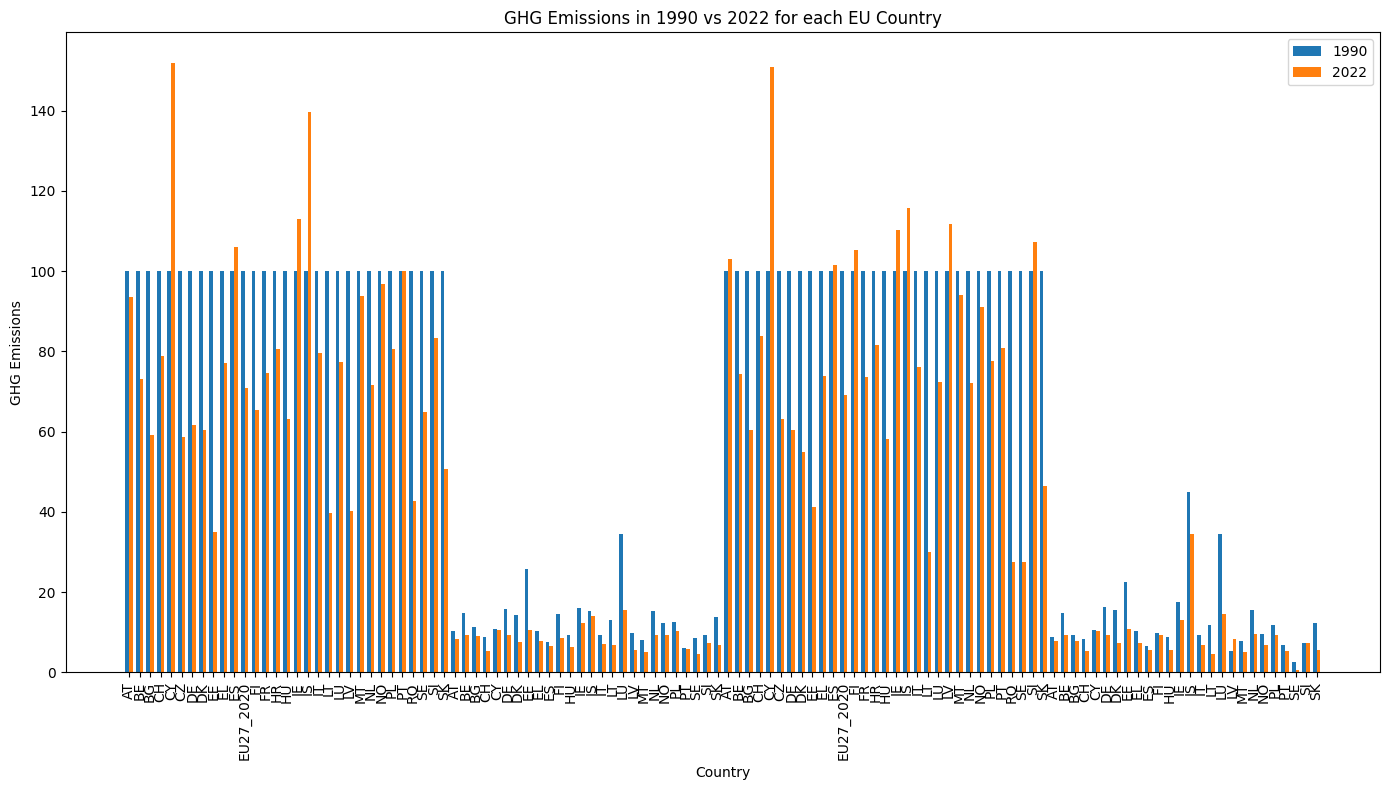

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with the correct separator
file_path = '/content/estat_sdg_13_10.tsv'  # Path to your TSV file
data = pd.read_csv(file_path, sep='\t', engine='python')  # Using tab separator

# Clean column names by stripping extra spaces
data.columns = data.columns.str.replace(r'\s+', '', regex=True)

# Check the column names to confirm that they have been cleaned
print(data.columns)

# Split the column 'freq,airpol,src_crf,unit,geo\TIME_PERIOD' into individual columns
data[['freq', 'airpol', 'src_crf', 'unit', 'geo']] = data['freq,airpol,src_crf,unit,geo\\TIME_PERIOD'].str.split(',', expand=True)

# Select only relevant columns for GHG emissions in 1990 and 2022
filtered_data = data[['geo', '1990', '2022']].copy()

# Convert emissions data to numeric, handling non-numeric entries
filtered_data['1990'] = pd.to_numeric(filtered_data['1990'], errors='coerce')
filtered_data['2022'] = pd.to_numeric(filtered_data['2022'], errors='coerce')

# Drop rows with missing data in either 1990 or 2022
filtered_data = filtered_data.dropna(subset=['1990', '2022'])

# Plotting
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(filtered_data))

# Plot bars for 1990 and 2022
plt.bar(index, filtered_data['1990'], bar_width, label='1990')
plt.bar([i + bar_width for i in index], filtered_data['2022'], bar_width, label='2022')

# Labeling
plt.xlabel('Country')
plt.ylabel('GHG Emissions')
plt.title('GHG Emissions in 1990 vs 2022 for each EU Country')
plt.xticks([i + bar_width / 2 for i in index], filtered_data['geo'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


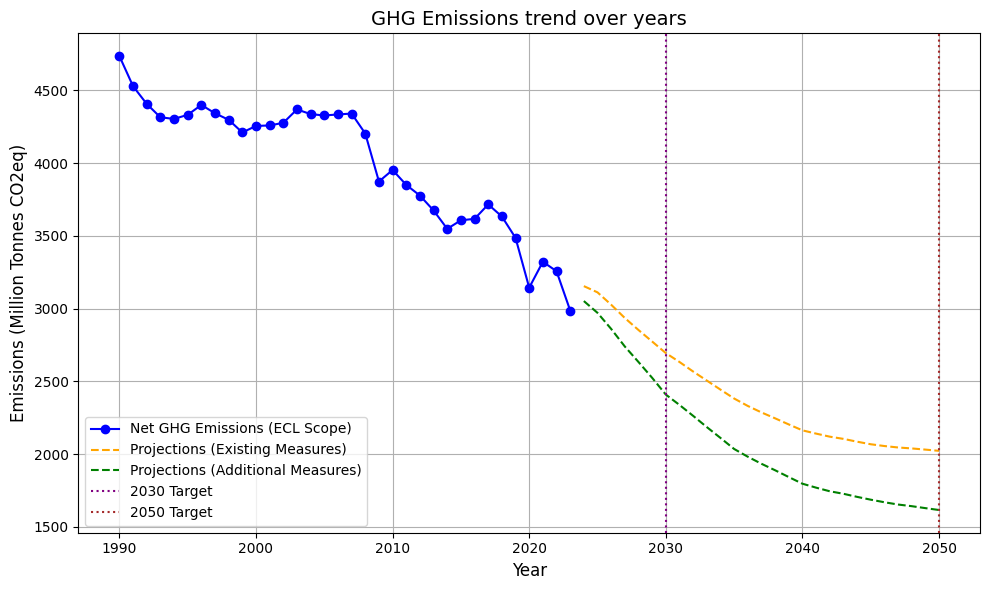

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
df = pd.read_excel('/content/EST.xlsx', sheet_name=0)

# Clean up the DataFrame
df.columns = df.iloc[0]  # Set the first row as the header
df = df.drop(index=0)  # Drop the first row as it's now used as header

# Extract years (column names after the first one)
years = df.columns[1:].astype(int)

# Separate data: First row for Net Greenhouse Gas Emissions (ECL Scope),
# and the second and third rows for Projections with existing and additional measures
net_ghg_emissions = df.iloc[0, 1:].values  # First row (Net Greenhouse gas emissions)
projections_wem = df.iloc[1, 1:].values  # Second row (Projections 'with existing measures')
projections_wam = df.iloc[2, 1:].values  # Third row (Projections 'with additional measures')

# Define the cutoff year (2023)
cutoff_year = 2023

# Separate data for years up to 2023 (first row) and after 2023 (second and third rows)
years_1990_2023 = years[years <= cutoff_year]
years_2024_onwards = years[years > cutoff_year]

# Data for emissions and projections for years 1990-2023
net_ghg_emissions_1990_2023 = net_ghg_emissions[:len(years_1990_2023)]

# Data for projections from 2024 onwards (using the second and third rows)
projections_wem_2024_onwards = projections_wem[len(years_1990_2023):]
projections_wam_2024_onwards = projections_wam[len(years_1990_2023):]

# Define the climate targets for 2020, 2030, and 2050
target_2030 = 2131
target_2050 = 0

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot the actual Net Greenhouse Gas Emissions (1990-2023)
plt.plot(years_1990_2023, net_ghg_emissions_1990_2023, label='Net GHG Emissions (ECL Scope)', color='blue', marker='o')

# Plot the Projections with Existing Measures (2024 onwards)
plt.plot(years_2024_onwards, projections_wem_2024_onwards, label="Projections (Existing Measures)", color='orange', linestyle='--')

# Plot the Projections with Additional Measures (2024 onwards)
plt.plot(years_2024_onwards, projections_wam_2024_onwards, label="Projections (Additional Measures)", color='green', linestyle='--')

# Adding target lines for 2020, 2030, and 2050
plt.axvline(x=2030, color='purple', linestyle=':', label='2030 Target')
plt.axvline(x=2050, color='brown', linestyle=':', label='2050 Target')

# Adding labels, title, and grid
plt.title('GHG Emissions trend over years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Emissions (Million Tonnes CO2eq)', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


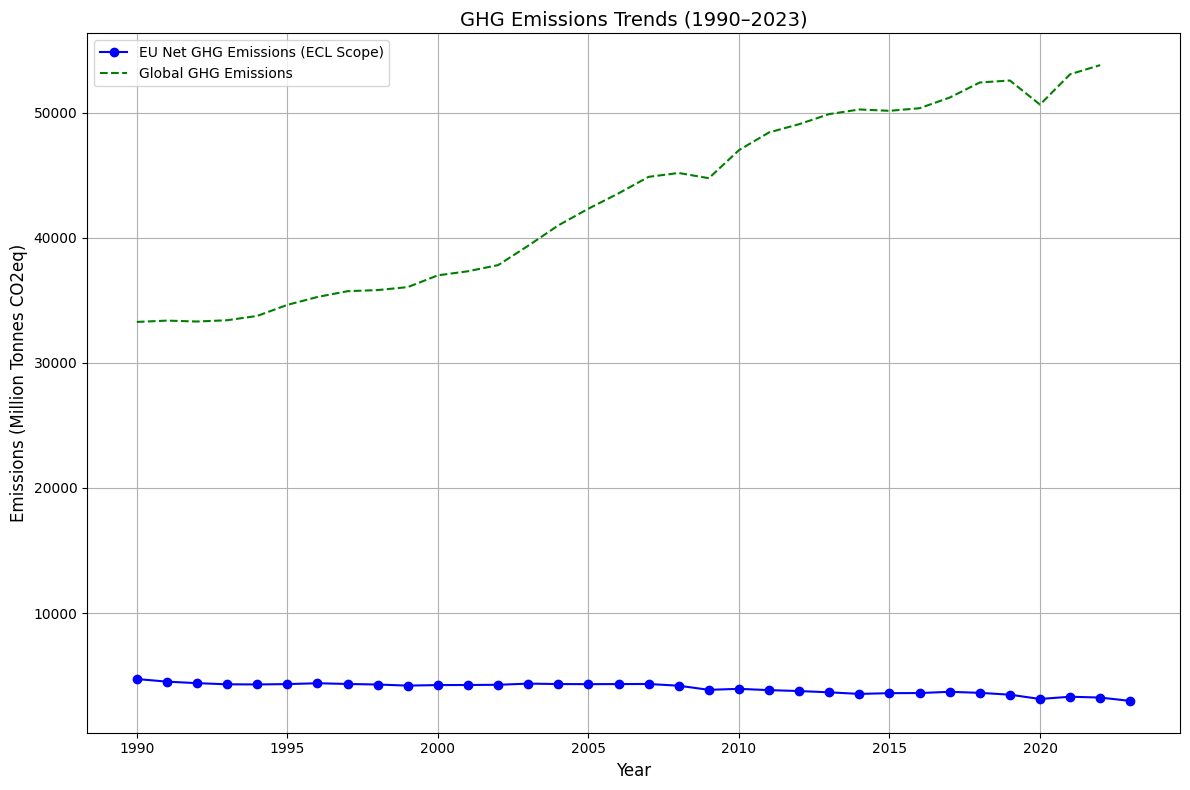

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Global data provided
global_years_full = list(range(1970, 2023))
global_emissions_full = [
    24497.54442, 24582.92091, 25521.45404, 26733.85934, 26742.38412, 26798.4541, 27950.65593, 28635.10984, 29238.85235,
    29941.62626, 29642.26003, 29136.69345, 28937.98432, 29175.19007, 29979.63329, 30299.72311, 30794.84987, 31544.22126,
    32508.28813, 33095.73799, 33268.12071, 33373.19073, 33301.23401, 33402.78703, 33747.71846, 34631.79795, 35262.13061,
    35724.02634, 35812.31496, 36051.3277, 36991.70704, 37316.89534, 37807.18338, 39354.85102, 40981.84826, 42318.4285,
    43539.56655, 44859.86746, 45168.46503, 44750.39493, 46991.56672, 48409.21681, 49068.90143, 49875.67509, 50242.99751,
    50134.38376, 50343.04445, 51195.41911, 52398.14326, 52557.33527, 50632.30945, 53056.60772, 53786.03891
]

# Filter global data for 1990–2023
global_years = global_years_full[20:]  # From 1990 onwards
global_emissions = global_emissions_full[20:]  # Corresponding emissions

# Load the EU data from the Excel file
file_path = '/content/EST.xlsx'  # Update with your file path
df = pd.read_excel(file_path, sheet_name=0)

# Clean up the DataFrame
df.columns = df.iloc[0]  # Set the first row as the header
df = df.drop(index=0)  # Drop the first row as it's now used as header

# Extract years and EU data
years = df.columns[1:].astype(int)
net_ghg_emissions = df.iloc[0, 1:].values  # Net GHG emissions (ECL Scope)

# Data for 1990-2023
cutoff_year = 2023
years_1990_2023 = years[years <= cutoff_year]
net_ghg_emissions_1990_2023 = net_ghg_emissions[:len(years_1990_2023)]

# Plotting EU and Global GHG Emissions
plt.figure(figsize=(12, 8))

# Plot EU Net GHG Emissions (1990–2023)
plt.plot(years_1990_2023, net_ghg_emissions_1990_2023, label='EU Net GHG Emissions (ECL Scope)', color='blue', marker='o')

# Plot Global GHG Emissions (1990–2022)
plt.plot(global_years, global_emissions, label='Global GHG Emissions', color='green', linestyle='--')

# Adding labels, title, and grid
plt.title('GHG Emissions Trends (1990–2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Emissions (Million Tonnes CO2eq)', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Load the TSV file into a DataFrame with error handling for bad lines
data = pd.read_csv("/content/estat_env_air_gge.tsv", sep="\t", on_bad_lines='skip')

# Check the first few rows to inspect the structure
print(data.head())

# Check the column names to confirm they match what you're expecting
print(data.columns)


  freq,unit,airpol,src_crf,geo\TIME_PERIOD 1985  1986  1987      1988   \
0                      A,MIO_T,CH4,CRF1,AT    :     :     :         :    
1                      A,MIO_T,CH4,CRF1,BE    :     :     :         :    
2                      A,MIO_T,CH4,CRF1,BG    :     :     :   0.10749    
3                      A,MIO_T,CH4,CRF1,CH    :     :     :         :    
4                      A,MIO_T,CH4,CRF1,CY    :     :     :         :    

      1989      1990      1991      1992      1993   ...     2013      2014   \
0        :   0.04832   0.04364   0.04276   0.04038   ...  0.02632   0.02421    
1        :   0.06407   0.05935   0.05341   0.05451   ...  0.04401   0.04001    
2  0.10792   0.09973   0.08446   0.09381   0.09467   ...  0.05964   0.05941    
3        :   0.01526   0.01561   0.01496   0.01415   ...  0.00711   0.00608    
4        :   0.00051   0.00052   0.00052   0.00052   ...  0.00053   0.00051    

      2015      2016      2017      2018      2019      2020      2021   \

In [ ]:
import pandas as pd

# Load the TSV file into a DataFrame with error handling for bad lines
data = pd.read_csv("/content/estat_env_air_gge.tsv", sep="\t", on_bad_lines='skip')

# Clean up column names by stripping extra spaces
data.columns = data.columns.str.strip()

# Check the first few rows to inspect the structure
print(data.head())

# Now, let's process the 'airpol' and 'geo' columns to aggregate emissions by year.
# We'll separate out the pollutants and years

# Extract the pollutants and years
pollutants = ['CO2', 'CH4', 'N2O', 'CO', 'PM10', 'PM2.5', 'NOx', 'NH3', 'SOx']

# Set up the years based on the column names (starting from the 2nd column onward)
years = data.columns[5:]

# Prepare a dictionary to store the aggregated emissions for each pollutant
pollutant_data = {pollutant: [] for pollutant in pollutants}

# Aggregate data for each pollutant across all countries
for pollutant in pollutants:
    # Filter the rows for the given pollutant
    pollutant_rows = data[data['airpol'] == pollutant]

    # Sum the emissions for each year across all countries for the given pollutant
    aggregated_emissions = pollutant_rows[years].apply(pd.to_numeric, errors='coerce').sum(axis=0)

    # Store the aggregated emissions for the given pollutant
    pollutant_data[pollutant] = aggregated_emissions

# Create a plot for each pollutant
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)  # Create subplots in a 3x3 grid
    plt.plot(years, pollutant_data[pollutant], label=f'{pollutant} Emissions', color='tab:blue')
    plt.title(f'{pollutant} Emissions (1985-2022)', fontsize=12)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Emissions (MIO_T)', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


Columns in the dataset: Index(['freq,unit,airpol,src_crf,geo\TIME_PERIOD', '1985 ', '1986 ', '1987 ',
       '1988 ', '1989 ', '1990 ', '1991 ', '1992 ', '1993 ', '1994 ', '1995 ',
       '1996 ', '1997 ', '1998 ', '1999 ', '2000 ', '2001 ', '2002 ', '2003 ',
       '2004 ', '2005 ', '2006 ', '2007 ', '2008 ', '2009 ', '2010 ', '2011 ',
       '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ', '2019 ',
       '2020 ', '2021 ', '2022 '],
      dtype='object')
  freq,unit,airpol,src_crf,geo\TIME_PERIOD 1985 1986 1987      1988      1989  \
0                      A,MIO_T,CH4,CRF1,AT   :    :    :         :         :    
1                      A,MIO_T,CH4,CRF1,BE   :    :    :         :         :    
2                      A,MIO_T,CH4,CRF1,BG   :    :    :   0.10749   0.10792    
3                      A,MIO_T,CH4,CRF1,CH   :    :    :         :         :    
4                      A,MIO_T,CH4,CRF1,CY   :    :    :         :         :    

       1990      1991      1992      1

ValueError: Columns must be same length as key

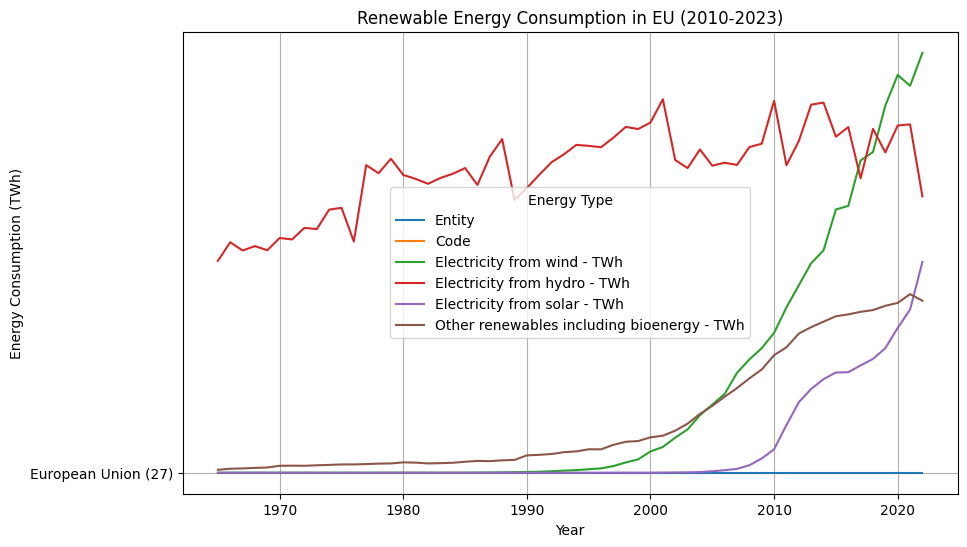

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = '/content/EST_2.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Set the 'Year' column as the index for easier plotting
data.set_index('Year', inplace=True)

# Plot each renewable energy type over the years
plt.figure(figsize=(10, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

# Customize the plot
plt.title('Renewable Energy Consumption in EU (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')  # Adjust units if needed
plt.legend(title='Energy Type')
plt.grid(True)
plt.show()


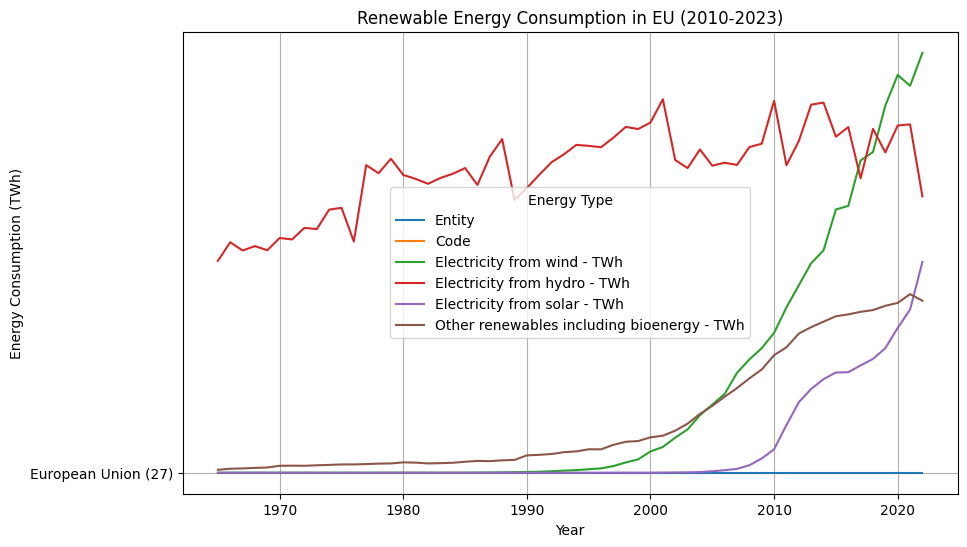

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'eu_renewable_energy.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Set the 'Year' column as the index for easier plotting
data.set_index('Year', inplace=True)

# Select columns from the 4th column onward (excluding 'entity' and 'code')
data = data.iloc[:, 3:]

# Plot each renewable energy type over the years
plt.figure(figsize=(10, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

# Customize the plot
plt.title('Renewable Energy Consumption in EU (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')  # Adjust units if needed
plt.legend(title='Energy Type')
plt.grid(True)
plt.show()


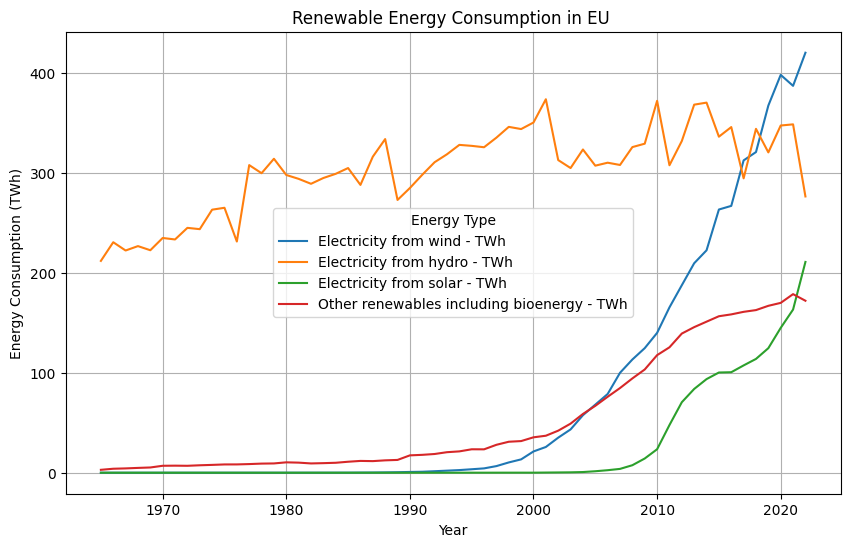

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = '/content/EST_2.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Set the 'Year' column as the index for easier plotting
data.set_index('Year', inplace=True)

# Select columns from the 4th column onward (excluding 'entity' and 'code')
data = data.iloc[:, 2:]

# Plot each renewable energy type over the years
plt.figure(figsize=(10, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

# Customize the plot
plt.title('Renewable Energy Consumption in EU ')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')  # Adjust units if needed
plt.legend(title='Energy Type')
plt.grid(True)
plt.show()


Cluster Centroids:
1990    1991.0    1992.0    1993.0    1994.0    1995.0    1996.0    1997.0  \
0    -0.454804 -0.456899 -0.454732 -0.458130 -0.458983 -0.456559 -0.458534   
1     3.201168  3.205031  3.211224  3.207762  3.206217  3.206655  3.207951   
2     0.297356  0.302352  0.293787  0.305137  0.308210  0.300793  0.306286   

1990    1998.0    1999.0    2000.0  ...    2009.0    2010.0    2011.0  \
0    -0.458986 -0.458291 -0.460205  ... -0.453472 -0.452457 -0.456402   
1     3.206905  3.208782  3.207654  ...  3.201447  3.201677  3.197644   
2     0.307989  0.305280  0.311396  ...  0.293268  0.290146  0.303324   

1990    2012.0    2013.0    2014.0    2015.0    2016.0    2017.0    NaN     
0    -0.453663 -0.451369 -0.455131 -0.453163 -0.451388 -0.451218  0.227044  
1     3.196296  3.200274  3.201393  3.203500  3.209183  3.214415 -0.604166  
2     0.295556  0.287348  0.298262  0.291655  0.284435  0.282182 -0.479743  

[3 rows x 28 columns]


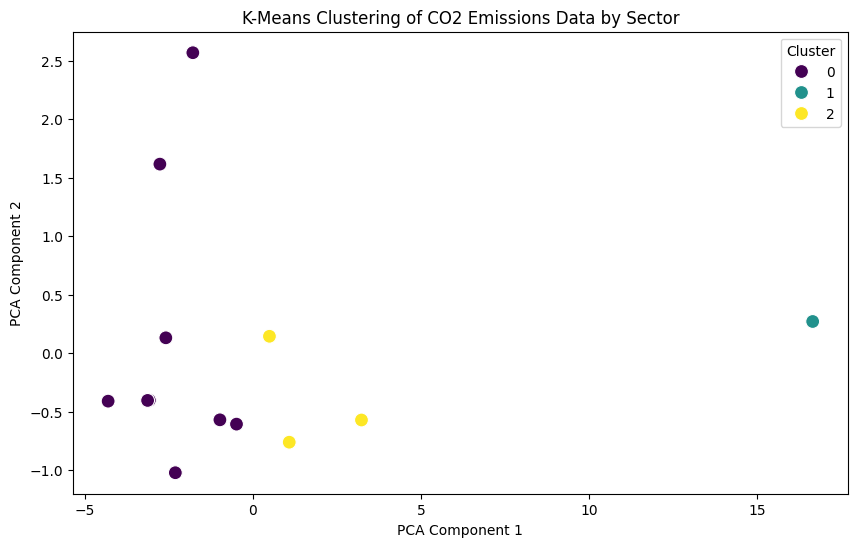

Cluster 0:
1990                1991.0        1992.0        1993.0        1994.0  \
728513.9013   779624.39060  725378.05850  739145.76490  691489.11270   
641656.102    609807.98740  584506.38980  575393.77220  568819.57030   
240421.2098   244025.84840  246077.51140  247040.62100  246587.28610   
69141.19088    68038.02380   73588.15851   77665.97465   81150.36434   
110720.8253   109111.36270  110811.11400  111563.07010  111332.64260   
201086.6735   212397.49880  210990.67270  229512.96260  229397.23000   
-244976.2409 -268692.53700 -238637.98180 -236752.35020 -246354.53880   
27966.52167    23768.08126   20935.43369   18734.13871   18301.32437   
kt CO2 eq.         0.00000       0.00000       0.00000       0.00000   

1990                1995.0        1996.0        1997.0        1998.0  \
728513.9013   695593.84620  759936.19210  712213.02510  700632.99810   
641656.102    569706.80140  573886.02720  567584.47460  561652.48040   
240421.2098   247432.18980  246648.37110  243614.228

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/ghg-emissions-by-aggregated-sector-5.csv', header=1)

# Drop any rows or columns with non-numeric entries (like "Unnamed: 4")
df = df.dropna(how='all', axis=1).dropna(how='all', axis=0)

# Set the index to the first column (which might be sector names)
df = df.set_index(df.columns[0])

# Transpose the DataFrame so that years become rows and sectors become columns
df = df.transpose()

# Ensure the data is numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Fill any NaN values with 0 for simplicity
df.fillna(0, inplace=True)

# Standardize the data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Inspect cluster centroids (mean values of each cluster)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1])
print("Cluster Centroids:")
print(centroids)

# Visualize clusters with PCA for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot the PCA results with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('K-Means Clustering of CO2 Emissions Data by Sector')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Optionally, print out the data points in each cluster
for cluster_num in range(kmeans.n_clusters):
    cluster_data = df[df['Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_data)


Unique pollutants in the data: ['CH4' 'CH4_CO2E' 'CO2' 'GHG' 'HFC_CO2E' 'HFC_PFC_NSP_CO2E' 'N2O'
 'N2O_CO2E' 'NF3_CO2E' 'PFC_CO2E' 'SF6_CO2E']
Filtered pollutants for plotting: ['CH4', 'CH4_CO2E', 'CO2', 'GHG', 'HFC_CO2E', 'HFC_PFC_NSP_CO2E', 'N2O', 'N2O_CO2E', 'NF3_CO2E', 'PFC_CO2E', 'SF6_CO2E']


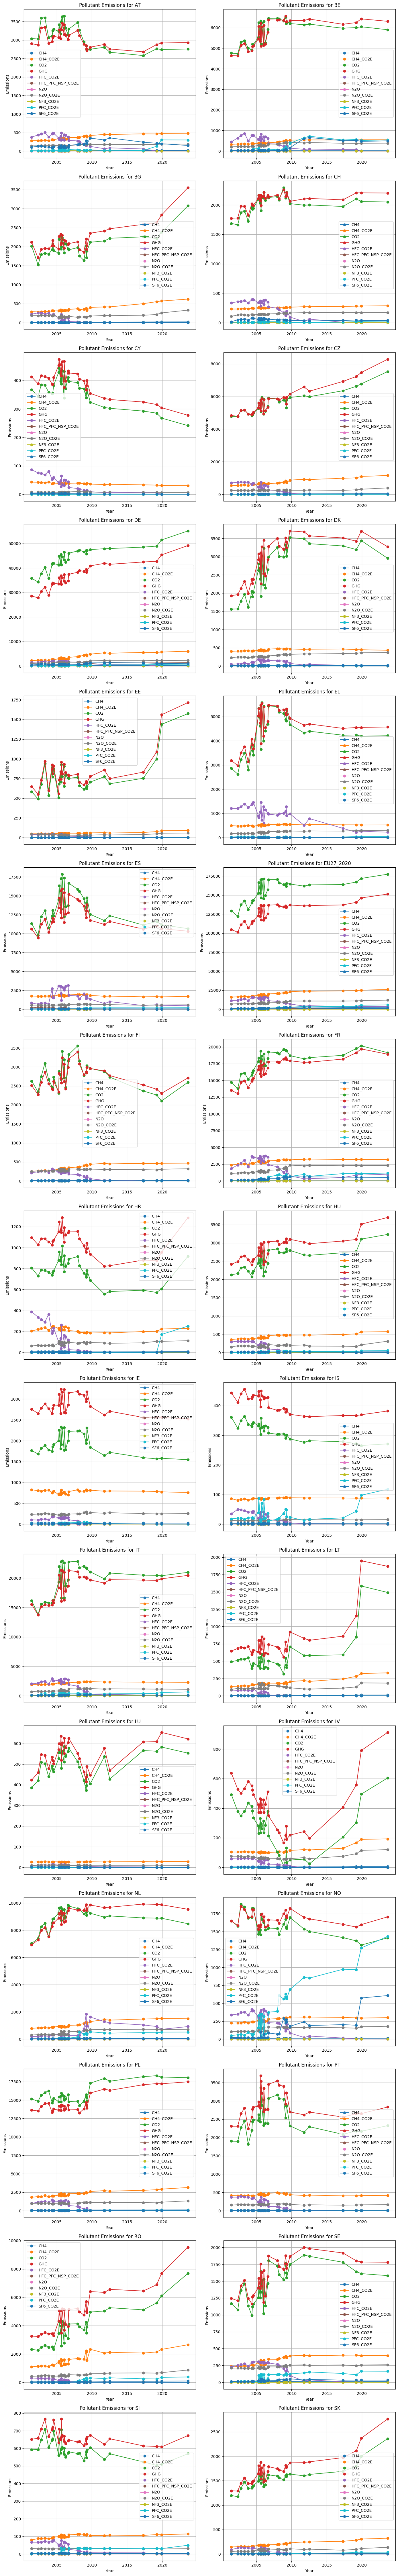

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data, skipping errors for irregular lines
url = '/content/estat_env_air_gge.tsv'
df = pd.read_csv(url, sep="\t", skiprows=1, na_values=":", on_bad_lines='skip')

# Split the first column into multiple columns based on commas
new_columns = ['freq', 'unit', 'airpol', 'src_crf', 'country']
df[new_columns] = df.iloc[:, 0].str.split(',', expand=True)

# Drop the original combined column
df = df.drop(columns=df.columns[0])

# Melt the DataFrame to reshape it with 'year' and 'emission' columns
df_melted = df.melt(id_vars=['country', 'freq', 'unit', 'airpol', 'src_crf'],
                    var_name='year', value_name='emission')

# Convert 'year' and 'emission' to numeric types, handling NaNs
df_melted['year'] = pd.to_numeric(df_melted['year'], errors='coerce')
df_melted['emission'] = pd.to_numeric(df_melted['emission'], errors='coerce')

# Assuming the year is encoded as fractions of years, for example:
# 0.02 represents the year 1985, 0.025 represents 1986, etc.
# We'll scale the year values accordingly.
base_year = 1985  # Assume year starts from 1985, adjust if needed
df_melted['year'] = base_year + (df_melted['year'] * 800)  # Adjust scaling if needed

# Check unique pollutants in the data
print("Unique pollutants in the data:", df_melted['airpol'].unique())

# List of potential pollutants
pollutants = ['CH4', 'CH4_CO2E', 'CO2', 'GHG', 'HFC_CO2E', 'HFC_PFC_NSP_CO2E',
              'N2O', 'N2O_CO2E', 'NF3_CO2E', 'PFC_CO2E', 'SF6_CO2E']

# Filter the pollutants that exist in the data (exclude invalid ones like 'N ' or 'EU27_2020')
available_pollutants = [p for p in pollutants if p in df_melted['airpol'].unique()]

# Check the pollutants after filtering
print("Filtered pollutants for plotting:", available_pollutants)

# Filter the data for the available pollutants
df_filtered = df_melted[df_melted['airpol'].isin(available_pollutants)]

# Pivot the table so each pollutant becomes a column, with country and year as index
df_pivot = df_filtered.pivot_table(index=['country', 'year'], columns='airpol', values='emission')

# Drop any rows with missing values in the pivot table
df_pivot = df_pivot.dropna().reset_index()

# Number of countries to plot
num_countries = len(df_pivot['country'].unique())

# Calculate the number of rows and columns for subplots (2 columns in each row)
rows = (num_countries + 1) // 2  # 2 plots per row, hence (num_countries+1)//2
cols = 2  # Always 2 plots per row

# Create a figure with subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 6 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot the emissions data for each country over the years
for idx, country in enumerate(df_pivot['country'].unique()):
    ax = axes[idx]  # Get the corresponding axis for this plot
    country_data = df_pivot[df_pivot['country'] == country]

    for pollutant in available_pollutants:
        if pollutant in country_data.columns:
            ax.plot(country_data['year'], country_data[pollutant], marker='o', label=pollutant)

    ax.set_title(f'Pollutant Emissions for {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Emissions')
    ax.legend()
    ax.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()
